# Melhoria de Imagem

#### Melhoria de imagem é basicamente aprimorar a percepção das informações de uma imagem para humanos e fornecer um input melhor para tecnicas de processamento de imagem. Durante este processo, atributos das imagens são modificados, a escolha desses atributos e o tipo de modificação é feita analiticamente, pelo autor da melhoria.

In [1]:
import pandas as pd 
import numpy as np
import os, os.path
import cv2
import matplotlib.pyplot as plt

## O PATH DEVE SER AJUSTADO DE ACORDO COM O SEU WORKSPACE
train_csv_path = '../../TEESW/severstal-steel-defect-detection/train.csv'

train_df = pd.read_csv(train_csv_path)
file_names = []
plt.rcParams['figure.figsize'] = [20, 16]


for i in range(0,train_df['ImageId_ClassId'].shape[0],4):
    file_names.append(train_df['ImageId_ClassId'][i].split('_')[0])

# Iluminação

#### Um dos problemas percebidos pelos alunos da matéria e alguns usuários do kaggle foi o alto nível de luminosidade presente em algumas das imagens do dataset.


In [2]:
bright_images = []

## O PATH DEVE SER AJUSTADO DE ACORDO COM O SEU WORKSPACE
train_image_path = '../../TEESW/severstal-steel-defect-detection/train_images/'

images_count = 0

for image in file_names:
    if images_count >= 5:
        break;
    current_image = cv2.imread(train_image_path + image)
    unique, counts = np.unique(current_image, return_counts=True)
    dicionario = dict(zip(unique, counts))
    soma = 0
    for i in range(200,256):
        if i in dicionario:
            soma += dicionario[i]
            if(soma >= 330000):
                bright_images.append(image)
                images_count += 1
                break;
        
print(bright_images)


['01cfacf80.jpg', '05d67a7ef.jpg', '063fa1630.jpg', '09c4ca5ef.jpg', '09d87038e.jpg']


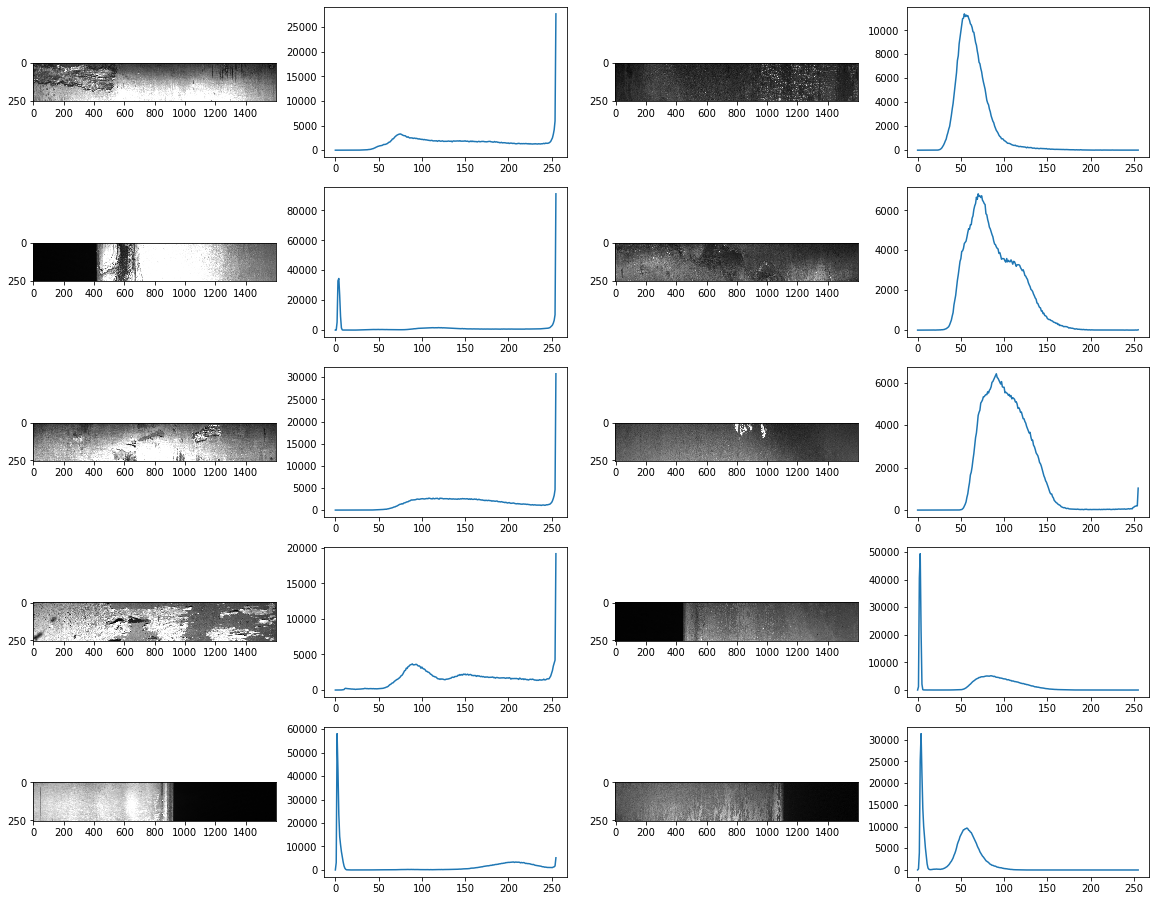

In [5]:
plt.rcParams['figure.figsize'] = [20, 16]

fig = plt.figure()

counter = 0
                
for image in bright_images:
    current_image = cv2.imread(train_image_path + image,0)
    fig.add_subplot(len(bright_images),4,1 + counter)
    counter += 1
    plt.set_cmap('gray')
    plt.imshow(current_image)
    
    fig.add_subplot(len(bright_images),4,1 + counter)
    counter += 1
    histr = cv2.calcHist([current_image],[0],None,[256],[0,256])
    plt.plot(histr)
    
    normal_image = cv2.imread(train_image_path + file_names[counter],0)
    fig.add_subplot(len(bright_images),4,1 + counter)
    counter += 1
    plt.imshow(normal_image)
    fig.add_subplot(len(bright_images),4,1 + counter)
    histr = cv2.calcHist([normal_image],[0],None,[256],[0,256])
    counter += 1
    plt.plot(histr)
    
    
    

## Equalização adaptativa de histograma

##### Uma das possíveis técnicas para resolver o problema do excesso de brilho é o CLAHE (contrast limited adaptive histogram equalization), na qual a imagem é dividida em blocos chamados "tiles", em seguida a equalização é feita em cada bloco.

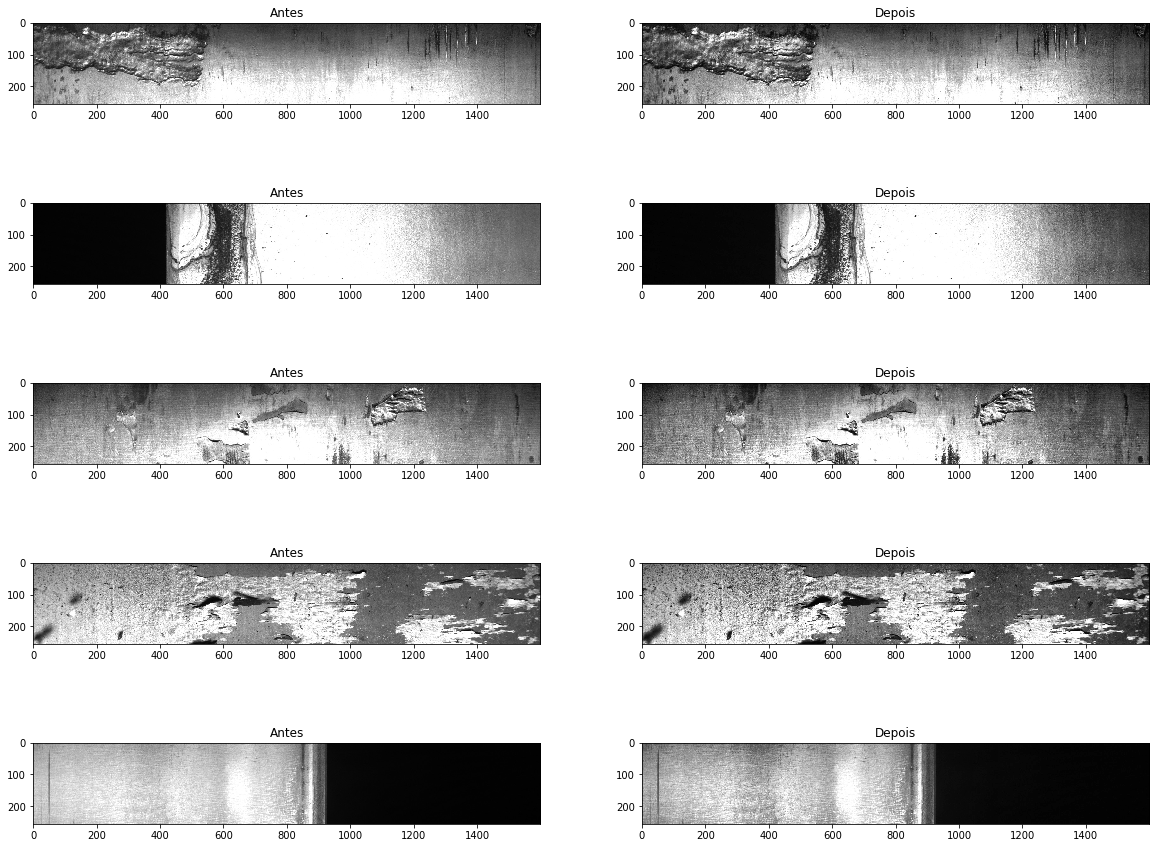

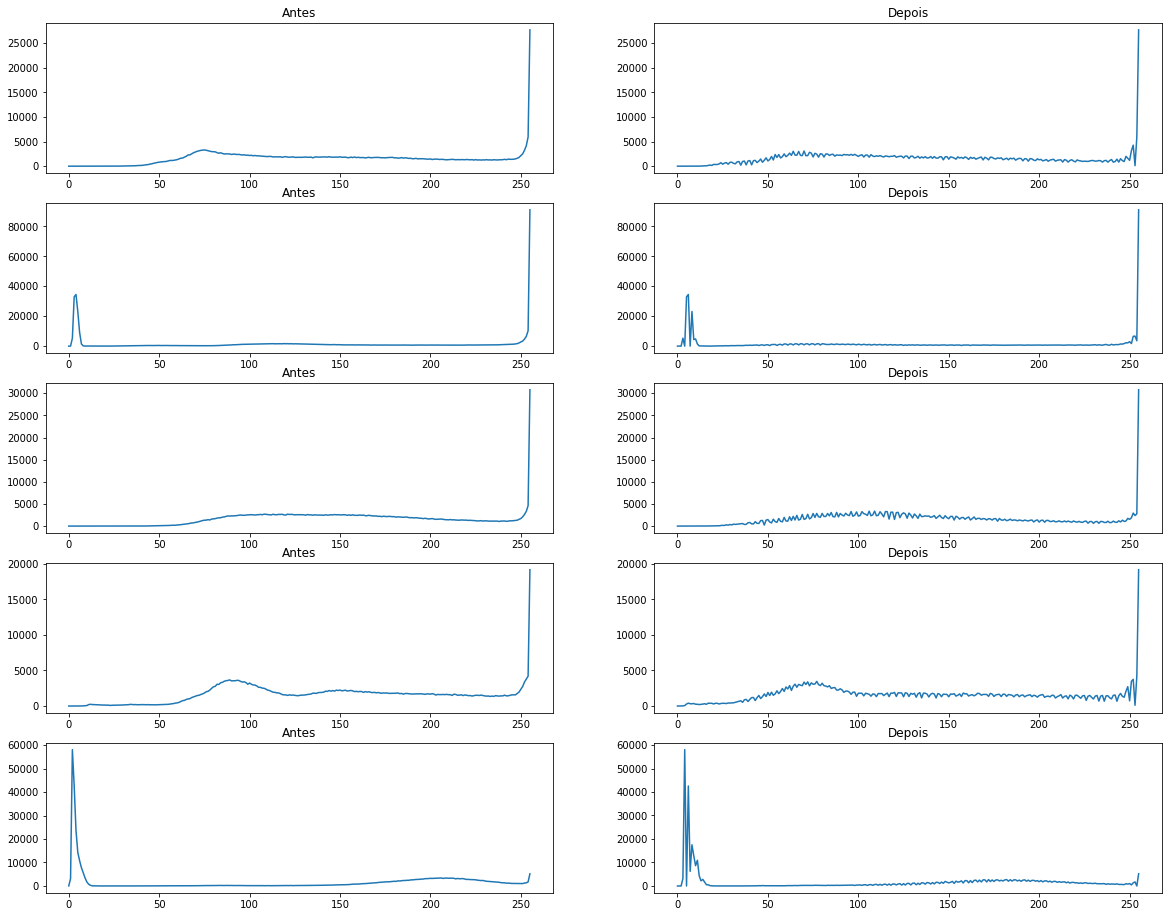

In [10]:
import preprocessing as pp # Descrição das funções está no presente no arquivo preprocessing.py

plt.rcParams['figure.figsize'] = [20, 16]

# 'e' para equalização

pp.visualizar_imagens(bright_images,'e')
    
pp.visualizar_histogramas(bright_images,'e')
    

## Normalização / Contrast Stretching

##### Técnica que visa melhor o contraste de uma imagem ao alongar o alcance da intensidade dos valores contidos em uma imagem, convertendo à um alcance de intensidade desejado

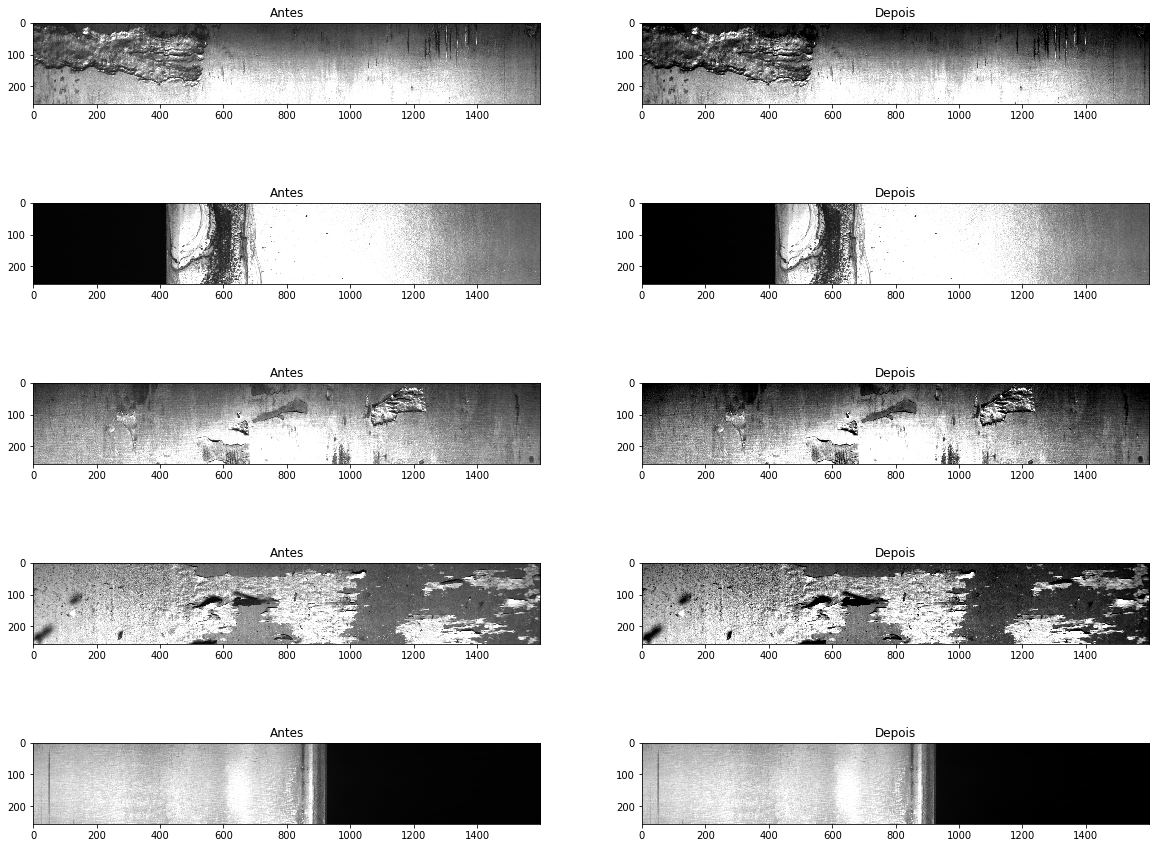

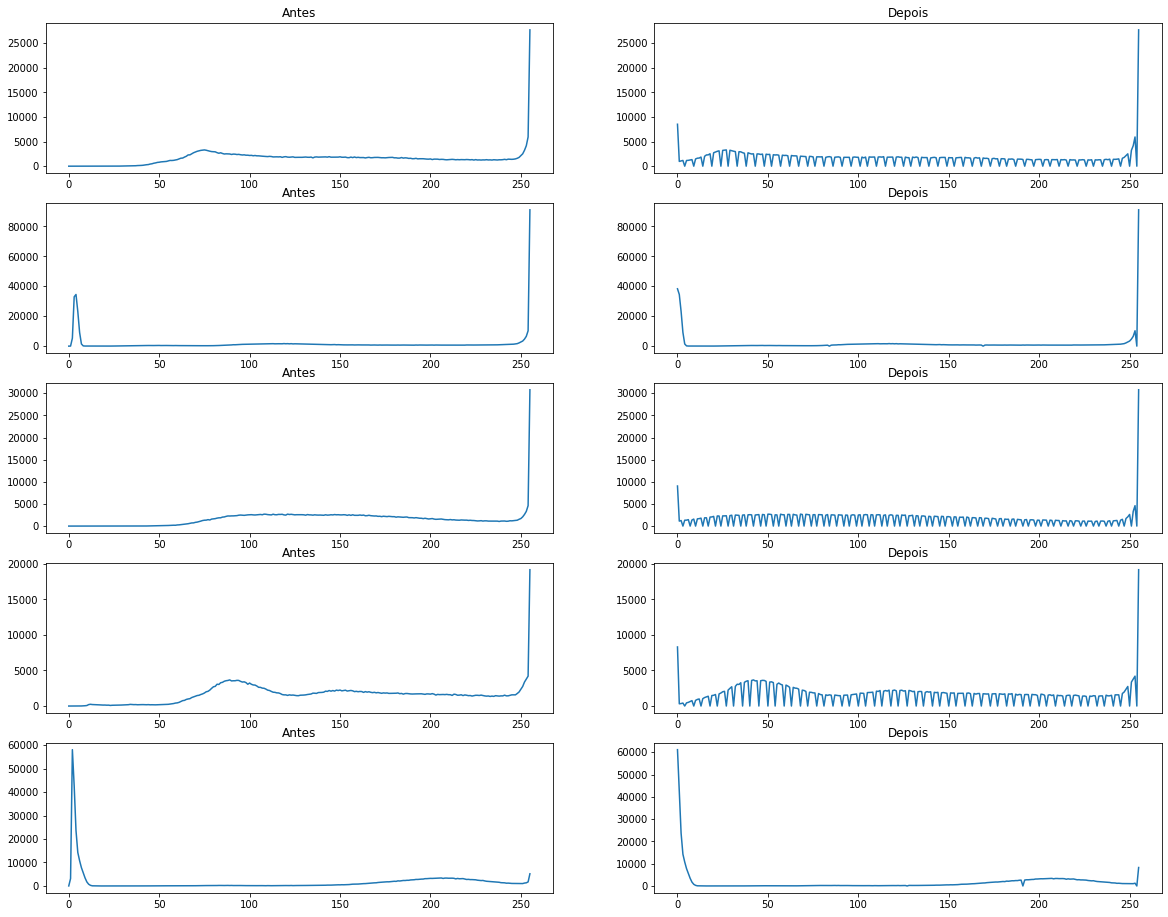

In [9]:
# 'n' para normalização

pp.visualizar_imagens(bright_images,'n')

pp.visualizar_histogramas(bright_images,'n')

In [51]:
%%timeit
for image_name in file_names:
    current_image = cv2.imread(train_image_path + image_name,0) 
    new_image = pp.equalizacao_adaptativa(current_image)

1min ± 900 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


00:08:05.063

In [54]:
%%timeit
for image_name in file_names:
    current_image = cv2.imread(train_image_path + image_name,0) 
    new_image = pp.normalizacao(current_image)

2min 13s ± 469 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


00:17:51.925

# Referências:

* https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_histograms/py_histogram_equalization/py_histogram_equalization.html#py-histogram-equalization
* https://arxiv.org/pdf/1003.4053.pdf
* https://www.allaboutcircuits.com/technical-articles/image-histogram-characteristics-machine-learning-image-processing/
* https://www.kaggle.com/kmader/qbi-illumination-correction/notebook#Overview
* http://homepages.inf.ed.ac.uk/rbf/HIPR2/stretch.htm
* https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_equalize.html#id4
